In [12]:
import pandas as pd

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Install necessary libraries
!pip install tensorflow==2.12.0
!pip install opencv-python
!pip install split-folders==0.5.1

# Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
import os
import splitfolders

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# --- Data splitting using splitfolders ---
# Input and output folder paths
input_folder = '/content/drive/MyDrive/ML-Lab/project/Dataset'  # Path to your original Dataset folder
output_folder = '/content/drive/MyDrive/ML-Lab/project/testig'  # Path for split folders

# Split the dataset
splitfolders.ratio(input_folder, output=output_folder, seed=1337, ratio=(.8, 0.1, 0.1))
# --- End of data splitting ---

# Set up data directories using the split folders
train_dir = os.path.join(output_folder, 'train')
val_dir = os.path.join(output_folder, 'val')
test_dir = os.path.join(output_folder, 'test')

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Define the CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

# Save the model (optional)
model.save('vehicle_classifier.h5')

# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

loss, accuracy = model.evaluate(test_generator)
print('Test accuracy:', accuracy)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Copying files: 400 files [00:08, 44.90 files/s]

Found 320 images belonging to 4 classes.
Found 40 images belonging to 4 classes.


Epoch 1/10
 4/10 [===========>..................] - ETA: 13s - loss: 2.4546 - accuracy: 0.2734

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


10/10 [==============================] - 25s 2s/step - loss: 1.8763 - accuracy: 0.2688 - val_loss: 1.3434 - val_accuracy: 0.2812
Epoch 2/10
10/10 [==============================] - 24s 2s/step - loss: 1.3356 - accuracy: 0.3469 - val_loss: 1.3196 - val_accuracy: 0.3438
Epoch 3/10
10/10 [==============================] - 20s 2s/step - loss: 1.2255 - accuracy: 0.4437 - val_loss: 1.1370 - val_accuracy: 0.6250
Epoch 4/10
10/10 [==============================] - 22s 2s/step - loss: 1.0337 - accuracy: 0.5656 - val_loss: 0.9392 - val_accuracy: 0.6250
Epoch 5/10
10/10 [==============================] - 20s 2s/step - loss: 0.9289 - accuracy: 0.6344 - val_loss: 0.9806 - val_accuracy: 0.5938
Epoch 6/10
10/10 [==============================] - 22s 2s/step - loss: 0.7923 - accuracy: 0.7188 - val_loss: 1.0125 - val_accuracy: 0.6250
Epoch 7/10
10/10 [==============================] - 20s 2s/step - loss: 0.6986 - accuracy: 0.7344 - val_loss: 0.8228 - val_accuracy: 0.7500
Epoch 8/10
10/10 [=============

In [ ]:
from tensorflow.keras.preprocessing import image

# Load and preprocess the new image
img_path = '/content/drive/MyDrive/ML-Lab/project/Dataset/Car/Image_12.jpg'  # Replace with the actual path
img = image.load_img(img_path, target_size=(128, 128))  # Resize to match model input
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.  # Normalize pixel values

# Make prediction
prediction = model.predict(img_array)

# Get the predicted class
predicted_class_index = np.argmax(prediction)
class_labels = list(train_generator.class_indices.keys())  # Get class labels
predicted_class = class_labels[predicted_class_index]

print('Predicted class:', predicted_class)

1/1 [==============================] - 0s 248ms/step
Predicted class: Car


1/1 [==============================] - 0s 33ms/step


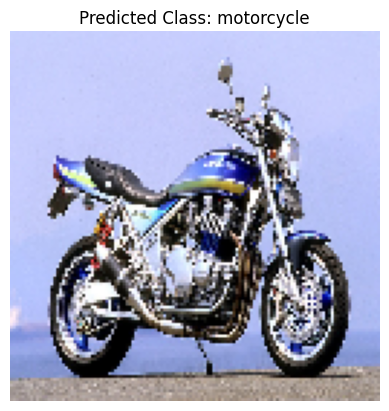

In [20]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def classify_vehicle_and_display(img_path):
    # Load and preprocess image
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.

    # Make prediction
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    class_labels = list(train_generator.class_indices.keys())
    predicted_class = class_labels[predicted_class_index]

    # Display image and prediction
    plt.imshow(img)
    plt.title(f"Predicted Class: {predicted_class}")
    plt.axis('off')  # Hide axes
    plt.show()

# Example usage
img_path = '/content/drive/MyDrive/ML-Lab/project/Image_7.jpg'  # Path to your test image
classify_vehicle_and_display(img_path)